In [276]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [277]:
start_date = '2023-12-11'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-11  End Date: 2024-12-1


In [278]:
ticker = 'MCD'

df = yf.download(ticker, start=start_date, end=end_date)
df.head(15)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,
2023-12-11,282.308655,289.149994,289.309998,285.559998,285.559998,3353000
2023-12-12,284.524994,291.420013,291.700012,288.510010,289.119995,2252200
2023-12-13,288.928253,295.929993,295.970001,291.549988,291.690002,3312300
2023-12-14,283.158081,290.019989,295.269989,288.010010,294.600006,4626800
2023-12-15,280.473145,287.269989,291.750000,285.720001,290.410004,6324300
2023-12-18,283.363129,290.230011,290.589996,287.559998,288.649994,2490100
2023-12-19,283.851288,290.730011,291.720001,289.589996,290.670013,2054200
2023-12-20,282.152435,288.989990,291.670013,288.720001,290.730011,2398500


In [279]:
df1 = yf.download(ticker,start='2024-11-10',end=date.today())
df1 = df1['Close']
df1.columns = ['Close']
df1.shape

[*********************100%***********************]  1 of 1 completed


(30, 1)

In [280]:
#spliting training and testing data
train_size= int(len(df)*0.8)
train,test = df[:train_size],df[train_size:]

In [281]:
train

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,
2023-12-11,282.308655,289.149994,289.309998,285.559998,285.559998,3353000
2023-12-12,284.524994,291.420013,291.700012,288.510010,289.119995,2252200
2023-12-13,288.928253,295.929993,295.970001,291.549988,291.690002,3312300
2023-12-14,283.158081,290.019989,295.269989,288.010010,294.600006,4626800
2023-12-15,280.473145,287.269989,291.750000,285.720001,290.410004,6324300
...,...,...,...,...,...,...
2024-09-16,294.915924,296.690002,300.109985,295.040009,297.420013,2916200
2024-09-17,291.993500,293.750000,297.390015,292.170013,297.000000,2997400


In [282]:
test

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MCD,MCD,MCD,MCD,MCD,MCD
Date,,,,,,
2024-09-23,297.271759,299.059998,300.220001,296.890015,299.000000,2312400
2024-09-24,298.474518,300.269989,301.450012,297.700012,299.059998,2408100
2024-09-25,298.673340,300.470001,301.799988,298.399994,300.329987,1986200
2024-09-26,301.834320,303.649994,304.290009,300.739990,301.149994,1971100
2024-09-27,301.874084,303.690002,306.959991,303.519989,303.519989,3402800
2024-09-30,302.689178,304.510010,305.029999,302.100006,303.750000,2286500
2024-10-01,301.168335,302.980011,305.230011,302.250000,304.510010,3036200
2024-10-02,301.943665,303.760010,304.079987,299.579987,300.579987,2352400


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2023-12-11 to 2024-11-29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, MCD)  245 non-null    float64
 1   (Close, MCD)      245 non-null    float64
 2   (High, MCD)       245 non-null    float64
 3   (Low, MCD)        245 non-null    float64
 4   (Open, MCD)       245 non-null    float64
 5   (Volume, MCD)     245 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.4 KB


In [284]:
df.isnull().sum()

Price      Ticker
Adj Close  MCD       0
Close      MCD       0
High       MCD       0
Low        MCD       0
Open       MCD       0
Volume     MCD       0
dtype: int64

In [285]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

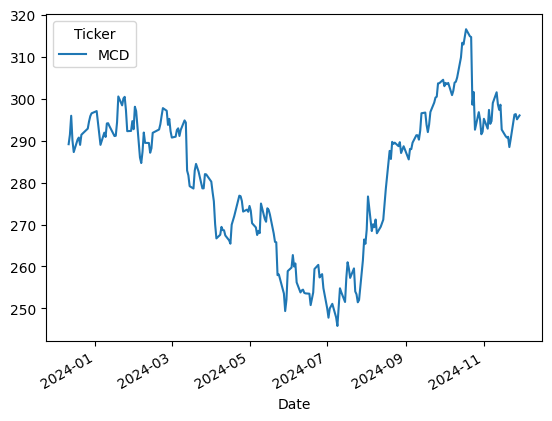

In [286]:
df['Close'].plot()

In [287]:
# df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
# df.head(14)
# df[['Close','Close Rolling 10']].plot()
# df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()
# df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
# df
# df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()
# #cummulative MOving average
# df['CMA']=df['Close'].expanding().mean()
# df
# df[['Close','CMA']].plot()

In [288]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [289]:
adf_test(df['Close'])

ADF Statistics: -1.3953594750705736
p- value: 0.5844988113833991
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [290]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,First Difference
Ticker,MCD,MCD,MCD,MCD,MCD,MCD,
Date,,,,,,,
2023-12-11,282.308655,289.149994,289.309998,285.559998,285.559998,3353000,NaN
2023-12-12,284.524994,291.420013,291.700012,288.510010,289.119995,2252200,2.270020
2023-12-13,288.928253,295.929993,295.970001,291.549988,291.690002,3312300,4.509979
2023-12-14,283.158081,290.019989,295.269989,288.010010,294.600006,4626800,-5.910004
2023-12-15,280.473145,287.269989,291.750000,285.720001,290.410004,6324300,-2.750000


In [291]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.175392957451663
p- value: 6.3053856602908215e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

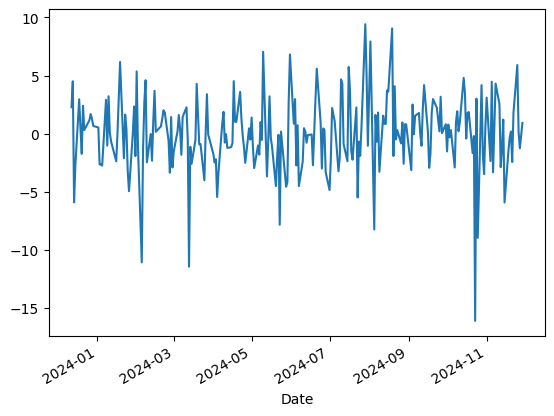

In [292]:
df['First Difference'].dropna().plot()

In [293]:
# df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)
# df
# Applying Auto_ARIMA
# step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
# step.summary()

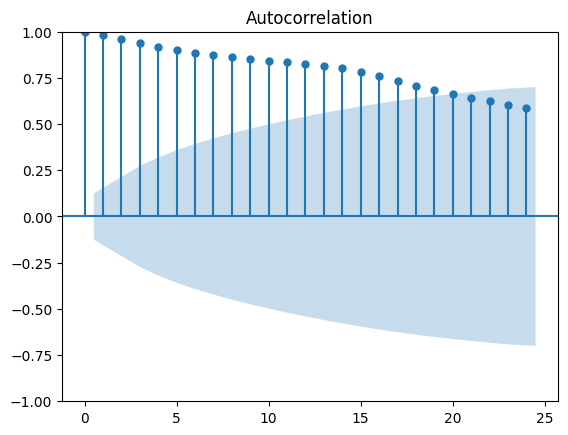

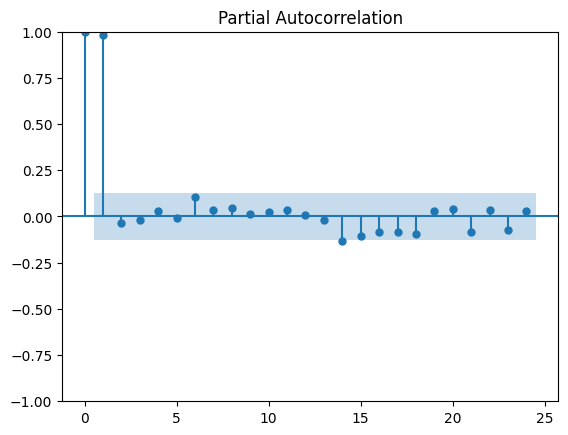

In [294]:
acf = plot_acf(df["Close"].dropna())
pacf = plot_pacf(df["Close"].dropna())

In [295]:
model_ARIMA=ARIMA(train['Close'],order=(19,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax

In [296]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    MCD   No. Observations:                  196
Model:                ARIMA(19, 2, 3)   Log Likelihood                -480.299
Date:                Tue, 24 Dec 2024   AIC                           1006.599
Time:                        12:04:21   BIC                           1081.759
Sample:                             0   HQIC                          1037.033
                                - 196                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5803      0.104    -15.149      0.000      -1.785      -1.376
ar.L2         -1.0206      0.206     -4.956      0.000      -1.424      -0.617
ar.L3         -0.2428      0.225     -1.077      0.282      -0.685       0.199
ar.L4         -0.1535      0.212     -0.723      0.469      -0.569       0.262
ar.L5         -0.1136      0.225     -0.504      0.614      -0.555       0.328
ar.L6         -0.2189      0.260     -0.842      0.400      -0.728       0.291
ar.L7         -0.1555      0.286     -0.543      0.587      -0.717       0.406
ar.L8         -0.0103      0.290     -0.036      0.972      -0.578       0.558
ar.L9          0.0415      0.251      0.165      0.869      -0.450       0.533
ar.L10        -0.0274      0.257     -0.107      0.915      -0.530       0.476
ar.L11        -0.0682      0.291     -0.234      0.815      -0.638       0.502
ar.L12         0.0099      0.297      0.034      0.973      -0.572       0.592
ar.L13         0.2623      0.252      1.042      0.297      -0.231       0.755
ar.L14         0.4483      0.219      2.047      0.041       0.019       0.878
ar.L15         0.5381      0.237      2.269      0.023       0.073       1.003
ar.L16         0.4521      0.237      1.907      0.057      -0.013       0.917
ar.L17         0.3524      0.229      1.541      0.123      -0.096       0.801
ar.L18         0.2060      0.187      1.104      0.270      -0.160       0.572
ar.L19         0.0313      0.110      0.285      0.775      -0.184       0.247
ma.L1          0.6512      1.756      0.371      0.711      -2.791       4.093
ma.L2         -0.6838      2.919     -0.234      0.815      -6.406       5.038
ma.L3         -0.9666      1.724     -0.561      0.575      -4.345       2.412
sigma2         7.9956     13.841      0.578      0.563     -19.133      35.124
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                40.63
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.48
Prob(H) (two-sided):                  0.55   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [297]:
start_p=len(train)
end_p=len(train)+len(test)-1
pred_arima=model_ARIMA_fit.predict(start=start_p,end=end_p,typ='levels')

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [298]:
# residuals=df['Close']-pred_arima
# model_ARIMA_fit.resid.plot()
# model_ARIMA_fit.resid.plot(kind='kde')

In [299]:
df['Predicted_ARIMA']=pred_arima

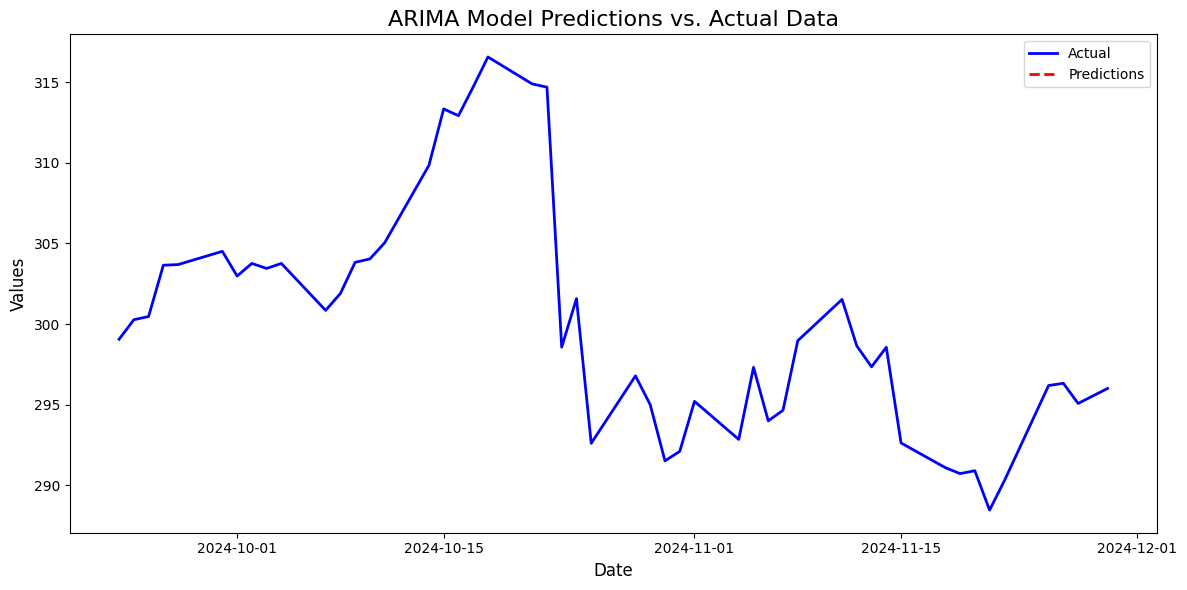

In [300]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='blue', linewidth=2)
plt.plot(df.index, df['Predicted_ARIMA'], label='Predictions', color='red', linestyle='--', linewidth=2)
plt.title('ARIMA Model Predictions vs. Actual Data', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

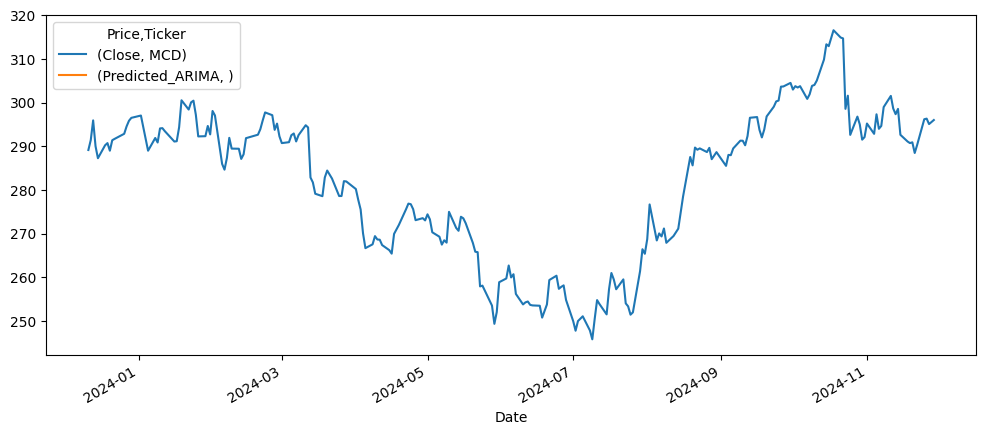

In [301]:
df[['Close','Predicted_ARIMA']].plot(figsize=(12,5))

In [302]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


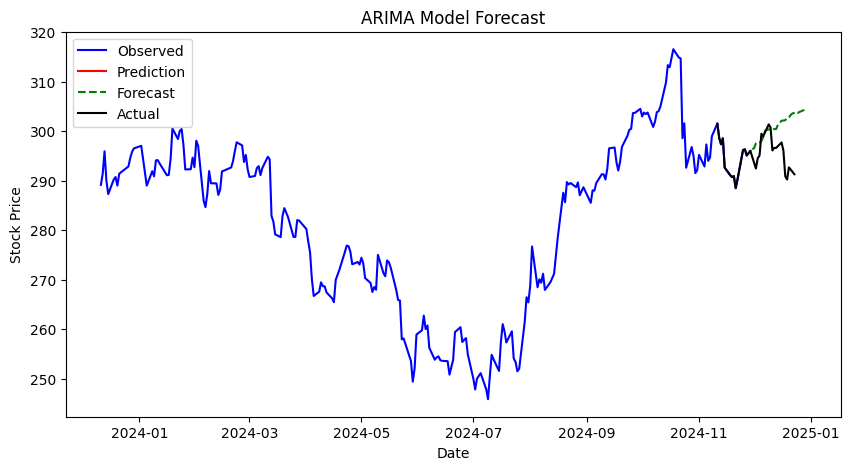

In [303]:
# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed',color='blue')
plt.plot(df['Predicted_ARIMA'],label= 'Prediction',color='red')

future_dates = [df.index[-1] + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]
plt.plot(future_dates,forecast, label='Forecast', color='green',linestyle='--')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Calculating Prediction Accuracy

In [304]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [305]:
test_data = np.array(df['Close'].values)
test_data

array([[289.1499939 ],
       [291.42001343],
       [295.92999268],
       [290.01998901],
       [287.26998901],
       [290.23001099],
       [290.73001099],
       [288.98999023],
       [291.39001465],
       [291.70001221],
       [292.85998535],
       [294.54998779],
       [295.83999634],
       [296.51000977],
       [297.04000854],
       [294.39001465],
       [291.73999023],
       [288.98999023],
       [291.8999939 ],
       [290.86999512],
       [294.08999634],
       [294.1499939 ],
       [293.47000122],
       [291.08999634],
       [291.16000366],
       [294.35998535],
       [300.52999878],
       [298.41000366],
       [300.04998779],
       [300.44000244],
       [297.20999146],
       [292.26000977],
       [292.30999756],
       [294.6499939 ],
       [292.72000122],
       [298.07998657],
       [297.04998779],
       [285.97000122],
       [284.6499939 ],
       [287.32998657],
       [291.92999268],
       [289.47000122],
       [289.44000244],
       [287

In [306]:
test_data.shape,pred_arima.shape

((245, 1), (49,))

In [307]:
rmse = np.sqrt(mean_squared_error(test_data, pred_arima))
mean_actual = np.mean(test_data)

# Accuracy Calculation
accuracy = 100 - (rmse / mean_actual * 100)

print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

ValueError: Found input variables with inconsistent numbers of samples: [245, 49]

Calculating Forecasting Accuracy

In [250]:
future_actual_prices= np.array(df1['Close'])
future_actual_prices

array([301.52999878, 298.6499939 , 297.3500061 , 298.55999756,
       292.63000488, 291.1000061 , 290.73001099, 290.91000366,
       288.47000122, 290.27999878, 296.19000244, 296.32998657,
       295.07998657, 296.01000977, 292.44000244, 294.5       ,
       295.08999634, 299.47000122, 298.98001099, 301.36999512,
       300.70999146, 296.1000061 , 296.63000488, 296.6000061 ,
       297.70999146, 296.07998657, 290.88000488, 290.23001099,
       292.67999268, 291.29000854])

In [251]:
future_forecast= np.array(forecast)
future_forecast.shape

(30,)

In [252]:
df1['Close'].shape,

((30,),)

In [253]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape_forecast = np.mean(np.abs((future_actual_prices - future_forecast) / future_actual_prices)) * 100

# Calculate accuracy
accuracy_forecast = 100 - mape_forecast

# Print results
print(f"Forecasting Accuracy: {accuracy_forecast:.2f}%")
print(f"MAPE for Forecasting: {mape_forecast:.2f}%")


Forecasting Accuracy: 99.03%
MAPE for Forecasting: 0.97%
